## **Project: Study On Panel Data Methodologies With Application To Macroeconometrics (Inflation Forecasting)**.

> ### **Title**: Merge of Dataset.


#### **Table of Contents:**
<ul>
<li><a href="#1">1. Delete countries with a large number of missing values.</a></li>
<li><a href="#2">2. Delete years with a large number of missing values.</a></li>
<li><a href="#3">3. Apply the interpolation to Missing Values.</a></li>
</ul>

<a id=''></a>

#### Dataset Description and Variable Overview:

---

> #### **Inflation & Price Stability**

| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| **PCPIPCH**       | Inflation, average consumer prices `(Target)`      | Percent change                                    |

---

> #### **Public Finance**
| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| GGSB_NPGDP        | General government structural balance              | Percent of potential GDP                          |
| GGXWDG_NGDP       | General government gross debt                      | Percent of GDP                                    |

---


> #### **Economic Output & Productivity**
| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| PPPPC             | Gross domestic product per capita, current prices  | Purchasing power parity; international dollars    |

---

> #### **International Trade & Balance**
| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| TX_RPCH           | Volume of exports of goods and services            | Percent change                                    |
| TM_RPCH           | Volume of imports of goods and services            | Percent change                                    |
---

> #### **Savings & Investment **
| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| NID_NGDP          | Total investment                                   | Percent of GDP                                    |

---

> #### **Country Metadata**

| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| Country_Code      | ID number for each country                         | ID                                                |
| Country           | Name of 70 countries                               | String                                            |
| Advanced_Country  | Is the country developed (1) or developing (0)?    | Boolean                                           |
| Years             | date from 2000 to 2024                             | Date                                              |

---


#### **1. Inflation & Price Stability (التضخم واستقرار الأسعار)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **PCPIPCH**   | Inflation (CPI) | معدل التضخم بناءً على متوسط أسعار المستهلكين؛ مؤشر رئيسي لاستقرار الأسعار. | المتغير الهدف، ويقيس بشكل مباشر مدى ارتفاع الأسعار. |

---

#### **2. Public Finance (المالية العامة)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **GGSB_NPGDP**  | Structural Budget Balance         | الميزان الهيكلي بعد خصم أثر الدورة الاقتصادية.                         | الفائض الهيكلي يُعتبر إشارة إلى سياسة مالية انكماشية تقلل من التضخم.      |
| **GGXWDG_NGDP** | Gross Government Debt (% of GDP)  | الدين العام كنسبة من الناتج؛ يعكس عبء الحكومة المالي.                  | ارتفاع الدين قد يُجبر الحكومة على التوسع النقدي مستقبلاً مما يزيد التضخم. |


---


#### **3. Economic Output & Productivity (الإنتاجية والناتج الاقتصادي)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **PPPPC**      | GDP per Capita (PPP)   | نصيب الفرد من الناتج باستخدام تعادل القوة الشرائية.             | ارتفاعه يشير إلى قدرة شرائية أعلى، ما قد يدفع بالأسعار إلى الارتفاع.               |

---


#### **4. International Trade & Balance (التجارة الدولية والحساب الجاري)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **TX_RPCH**   | Export Volume Growth            | نمو حجم الصادرات.                   | زيادة الصادرات قد تقلل المعروض المحلي وترفع الأسعار.                |
| **TM_RPCH**   | Import Volume Growth            | نمو حجم الواردات.                   | زيادة الواردات توفر بدائل أرخص وتقلل من التضخم.                     |

---

#### **5. Savings & Investment (الادخار والاستثمار)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **NID_NGDP**  | Gross Capital Formation | الاستثمار الإجمالي كنسبة من الناتج. | استثمار أكبر قد يرفع الإنتاج في الأجل الطويل مما يقلل التضخم. |

---

#### **6. Country Metadata (بيانات الدول)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **Country_Code**     | Country ID         | معرف رقمي فريد لكل دولة. | -                 |
| **Country**           | Country Name       | اسم الدولة.              | -                 |
| **Advanced_Country** | Development Status | متقدمة (1) أو نامية (0). | -                 |
| **Years**             | Year               | السنة ما بين 2000 و2024. | -                 |

---



**Import Library**

In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.gridspec import GridSpec
from statsmodels.nonparametric.smoothers_lowess import lowess


import glob
import math


sns.set(rc={'figure.figsize': [15,5]}, font_scale=1.2);
pd.set_option('future.no_silent_downcasting', True)


**Path**

In [2]:
# Use glob to get a list of all files with the .csv extension
folder_path = "../02-Dataset/02-DataBase"
files_list = glob.glob(folder_path + "/*.csv")
files_list

['../02-Dataset/02-DataBase\\01-Countries.csv',
 '../02-Dataset/02-DataBase\\02-Subject.csv',
 '../02-Dataset/02-DataBase\\03-Country_Subject_Notes.csv',
 '../02-Dataset/02-DataBase\\04-Years.csv',
 '../02-Dataset/02-DataBase\\05.1-WEO_Data_Countries.csv',
 '../02-Dataset/02-DataBase\\05.2-WEO_Data_Countries.csv',
 '../02-Dataset/02-DataBase\\06-Country_Groups.csv',
 '../02-Dataset/02-DataBase\\07-Group_Subject_Notes.csv',
 '../02-Dataset/02-DataBase\\08.1-Country_Classes.csv',
 '../02-Dataset/02-DataBase\\08.2-Country_Classes.csv',
 '../02-Dataset/02-DataBase\\08.3-Country_Classes.csv',
 '../02-Dataset/02-DataBase\\09.1-Country_Data_Group.csv',
 '../02-Dataset/02-DataBase\\09.2-Country_Data_Group.csv',
 '../02-Dataset/02-DataBase\\10-WEO_Data.csv',
 '../02-Dataset/02-DataBase\\10-WEO_Data_DB.csv']

**Load Dataset**

In [3]:

# Reorder columns based on priority to control inflation
# (Ensure column names match exactly what exists in your DataFrame)

ordered_columns = [
    # 8. Metadata
    "WEO_Country_Code", "Country", "Advanced_Country", "Year",
    
    # 1. Inflation & Price Stability
    "PCPIPCH",  # Inflation Rate (Consumer Prices, annual %)
    
    # 2. Public Finance
    "GGSB_NPGDP",   # General government structural balance
    "GGXWDG_NGDP",  # General government gross debt (% of GDP)
    
    # 3. Economic Output & Productivity & Exchange & Purchasing Power
    "PPPPC",        # GDP per capita based on PPP
    
    # 4. Exchange & Purchasing Power
    
    # 5. International Trade & Balance
    "TX_RPCH",      # Export volume growth
    "TM_RPCH",      # Import volume growth

    # 6. Savings & Investment
    "NID_NGDP",     # Investment (% of GDP)
    
]



In [4]:
df0 = pd.read_csv(folder_path+"/10-WEO_Data.csv")
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775 entries, 0 to 8774
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WEO_Country_Code  8775 non-null   int64  
 1   Country           8775 non-null   object 
 2   Advanced_Country  8775 non-null   int64  
 3   Year              8775 non-null   int64  
 4   BCA_NGDPD         7593 non-null   float64
 5   GGR_NGDP          6448 non-null   float64
 6   GGSB_NPGDP        2471 non-null   float64
 7   GGXWDG_NGDP       5726 non-null   float64
 8   GGX_NGDP          6395 non-null   float64
 9   LUR               4094 non-null   float64
 10  NGDP_RPCH         7916 non-null   float64
 11  NGSD_NGDP         6916 non-null   float64
 12  NID_NGDP          6923 non-null   float64
 13  PCPIPCH           7869 non-null   float64
 14  PPPEX             7829 non-null   float64
 15  PPPPC             7874 non-null   float64
 16  PPPSH             7808 non-null   float64


In [5]:
# Apply the new column order to the DataFrame
df1 = df0[ordered_columns]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775 entries, 0 to 8774
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WEO_Country_Code  8775 non-null   int64  
 1   Country           8775 non-null   object 
 2   Advanced_Country  8775 non-null   int64  
 3   Year              8775 non-null   int64  
 4   PCPIPCH           7869 non-null   float64
 5   GGSB_NPGDP        2471 non-null   float64
 6   GGXWDG_NGDP       5726 non-null   float64
 7   PPPPC             7874 non-null   float64
 8   TX_RPCH           6912 non-null   float64
 9   TM_RPCH           6868 non-null   float64
 10  NID_NGDP          6923 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 754.2+ KB


In [6]:
df1.isna().sum()

WEO_Country_Code       0
Country                0
Advanced_Country       0
Year                   0
PCPIPCH              906
GGSB_NPGDP          6304
GGXWDG_NGDP         3049
PPPPC                901
TX_RPCH             1863
TM_RPCH             1907
NID_NGDP            1852
dtype: int64

<a id='1'></a>

### **1. Delete countries with a large number of missing values:**

In [7]:
# List to store names of countries that meet the conditions
valid_countries = []

# Loop through each unique country to check the conditions
for country in df1['Country'].unique():
    # Filter the data for the current country
    df_country = df1[df1['Country'] == country]
    
    # Drop columns that are not actual data variables
    data_only = df_country.drop(columns=['WEO_Country_Code', 'Country', 'Advanced_Country'])
    
    # Calculate the overall missing value ratio
    overall_missing_ratio = data_only.isnull().mean().mean()
    
    # Calculate the maximum missing ratio for any single variable
    max_missing_per_variable = data_only.isnull().mean().max()
    
    # If the country meets the criteria, add it to the list
    if overall_missing_ratio <= 0.5 and max_missing_per_variable <= 0.8:
        valid_countries.append(country)

# Create a new DataFrame containing only the accepted countries
filtered_df = df1[df1['Country'].isin(valid_countries)].copy()

# Display a summary of the new filtered data
print(f"Number of countries selected: {len(valid_countries)}")
print("Selected countries:", valid_countries)


Number of countries selected: 83
Selected countries: ['United States', 'United Kingdom', 'Austria', 'Belgium', 'Denmark', 'France', 'Germany', 'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Sweden', 'Switzerland', 'Canada', 'Japan', 'Finland', 'Greece', 'Iceland', 'Ireland', 'Malta', 'Portugal', 'Spain', 'Türkiye', 'Australia', 'New Zealand', 'South Africa', 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Mexico', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Barbados', 'Grenada', 'Guyana', 'Suriname', 'Cyprus', 'Jordan', 'Egypt', 'Taiwan Province of China', 'Hong Kong SAR', 'India', 'Indonesia', 'Korea', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Angola', 'Botswana', 'The Gambia', 'Mauritius', 'Morocco', 'São Tomé and Príncipe', 'Tunisia', 'Belarus', 'Georgia', 'Kazakhstan', 'Bulgaria', 'Russia', 'China', 'Ukraine', 'Czech Republic', 'Slovak Republic', 'Estonia', 'Latvia', 'Serbia', 'Hungary', 'Lithuania',

<a id='2'></a>

### **2. Delete years with a large number of missing values:**

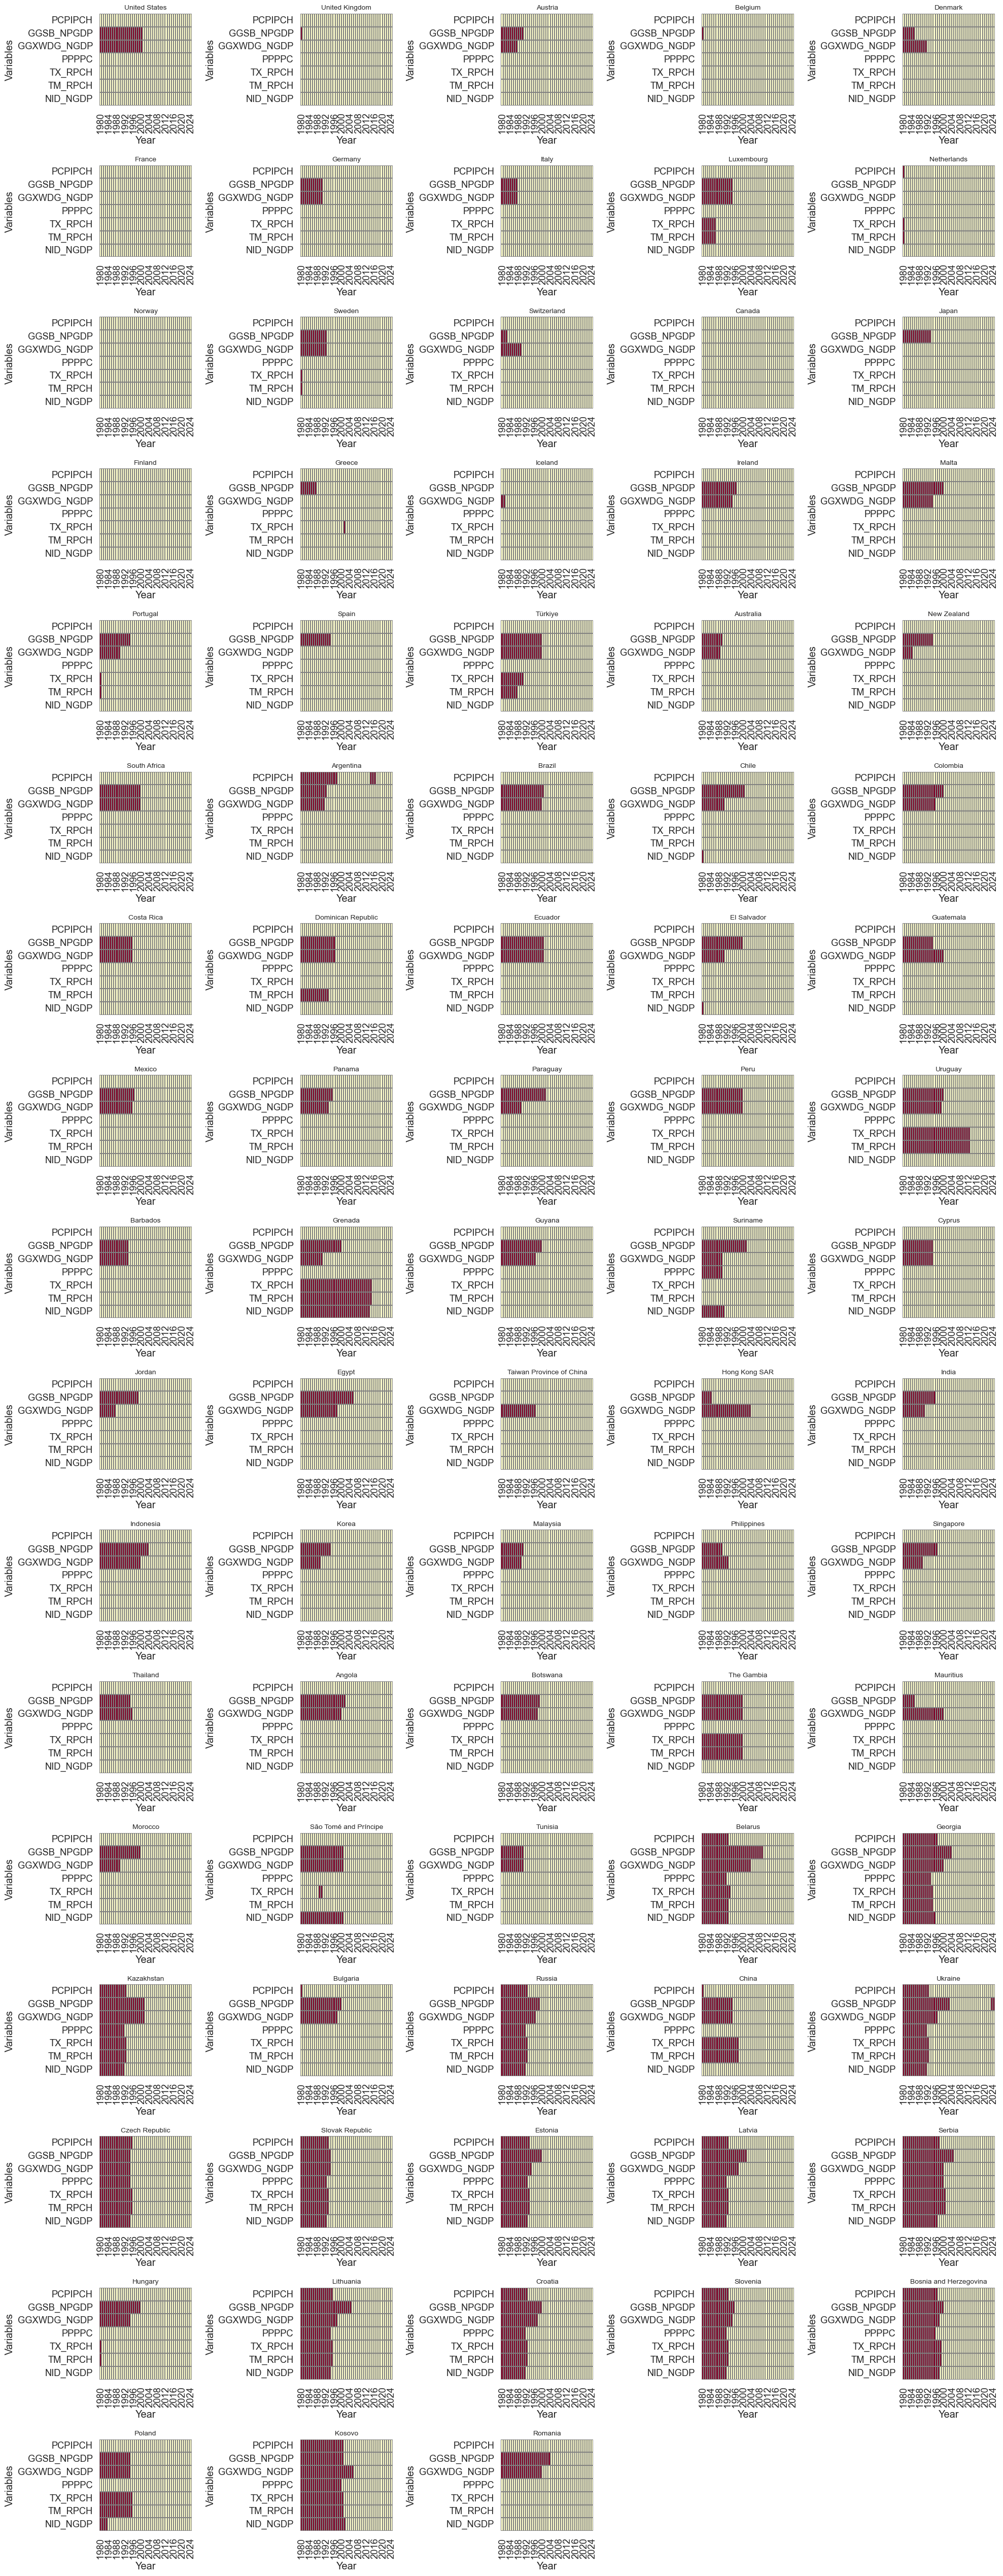

In [13]:
# Get the list of valid countries from the filtered DataFrame
countries = filtered_df['Country'].unique()

# Set the number of columns in the subplot grid
cols = 5
rows = math.ceil(len(countries) / cols)  # Calculate number of required rows

# Create a figure and axes for subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()  # Flatten to easily index axes

for idx, country in enumerate(countries):
    # Filter the DataFrame for the current country
    df_country = filtered_df[filtered_df['Country'] == country]

    # Drop non-data columns
    data_only = df_country.drop(columns=['WEO_Country_Code', 'Country', 'Advanced_Country'])

    # Group by 'Year' and calculate missing value ratios for each variable
    missing_by_year = data_only.groupby(df_country['Year']) \
                               .apply(lambda x: x.drop(columns=['Year'], errors='ignore').isnull().mean())

    # Transpose for heatmap format
    missing_by_year = missing_by_year.T

    # Plot in the current subplot axis
    ax = axes[idx]
    sns.heatmap(
        missing_by_year,
        cmap='YlOrRd',
        linewidths=0.3,
        linecolor='gray',
        cbar=False,  # Hide color bar in each subplot to avoid clutter
        ax=ax
    )

    ax.set_title(country, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel('Variables')

# Remove any unused axes
for j in range(len(countries), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
filtered_df2 = filtered_df.copy() #[filtered_df.Year.isin(np.arange(2000,2025))]
print(filtered_df2.shape)
filtered_df2.head()

(3735, 11)


,WEO_Country_Code,Country,Advanced_Country,Year,PCPIPCH,GGSB_NPGDP,GGXWDG_NGDP,PPPPC,TX_RPCH,TM_RPCH,NID_NGDP
0,111,United States,1,1980,13.502,NaN,NaN,12552.943,10.778,-6.664,23.310
1,111,United States,1,1981,10.378,NaN,NaN,13948.701,1.213,2.616,24.277
2,111,United States,1,1982,6.158,NaN,NaN,14404.994,-7.662,-1.264,22.071
3,111,United States,1,1983,3.160,NaN,NaN,15513.679,-2.589,12.609,22.253
4,111,United States,1,1984,4.368,NaN,NaN,17086.441,8.150,24.344,25.096


In [9]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3735 entries, 0 to 8774
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WEO_Country_Code  3735 non-null   int64  
 1   Country           3735 non-null   object 
 2   Advanced_Country  3735 non-null   int64  
 3   Year              3735 non-null   int64  
 4   PCPIPCH           3487 non-null   float64
 5   GGSB_NPGDP        2451 non-null   float64
 6   GGXWDG_NGDP       2613 non-null   float64
 7   PPPPC             3515 non-null   float64
 8   TX_RPCH           3360 non-null   float64
 9   TM_RPCH           3353 non-null   float64
 10  NID_NGDP          3449 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 350.2+ KB


In [10]:
filtered_df2.isna().sum()

WEO_Country_Code       0
Country                0
Advanced_Country       0
Year                   0
PCPIPCH              248
GGSB_NPGDP          1284
GGXWDG_NGDP         1122
PPPPC                220
TX_RPCH              375
TM_RPCH              382
NID_NGDP             286
dtype: int64

<a id='3'></a>

### **3. Apply the interpolation to Missing Values:**

In [11]:
# columns that missing values
cols_with_na = filtered_df2.columns[filtered_df2.isnull().any()].tolist()
cols_with_na

['PCPIPCH',
 'GGSB_NPGDP',
 'GGXWDG_NGDP',
 'PPPPC',
 'TX_RPCH',
 'TM_RPCH',
 'NID_NGDP']

In [12]:
# Sort the data by Country and Year (panel structure)
df_panel = filtered_df2.sort_values(by=['Country', 'Year']).copy()

# Drop non-numeric and identifier columns
df_numeric = df_panel.drop(columns=['WEO_Country_Code', 'Country', 'Advanced_Country', 'Year'])

# Select numeric columns
data_columns = df_numeric.columns
data_columns

Index(['PCPIPCH', 'GGSB_NPGDP', 'GGXWDG_NGDP', 'PPPPC', 'TX_RPCH', 'TM_RPCH',
       'NID_NGDP'],
      dtype='object')

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Copy 
df_panel_b = df_panel.copy()

# Handle missing values for each country 
def handle_missing_country(country):
    imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=20, random_state=0, verbose=2)
    country[cols_with_na] = imputer.fit_transform(country[cols_with_na])
    return country

# Apply
df_interpolated = df_panel_b.groupby('Country', group_keys=False).apply(handle_missing_country)

[IterativeImputer] Completing matrix with shape (45, 7)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.03
[IterativeImputer] Change: 1265.986795965884, scaled tolerance: 9.801001000000001 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.05
[IterativeImputer] Change: 15.665104241788248, scaled tolerance: 9.801001000000001 
[IterativeImputer] Ending imputation round 3/20, elapsed time 0.07
[IterativeImputer] Change: 0.000749275391065396, scaled tolerance: 9.801001000000001 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (45, 7)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.02
[IterativeImputer] Change: 144.26853537264873, scaled tolerance: 29.335855 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.04
[IterativeImputer] Change: 46.340888631792566, scaled tolerance: 29.335855 
[IterativeImputer] Ending imputation round 3/20, elapsed time 0.06
[IterativeImputer] Change: 2

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Ending imputation round 1/20, elapsed time 0.02
[IterativeImputer] Change: 20.674492339012307, scaled tolerance: 71.730789 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (45, 7)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.02
[IterativeImputer] Change: 5.563506617146821, scaled tolerance: 95.836636 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (45, 7)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.02
[IterativeImputer] Change: 118.3688757360434, scaled tolerance: 6.205203000000001 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.03
[IterativeImputer] Change: 0.22679372868686687, scaled tolerance: 6.205203000000001 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (45, 7)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.01
[IterativeImputer] 

C:\Users\DELL\AppData\Local\Temp\ipykernel_21392\1897214877.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_interpolated = df_panel_b.groupby('Country', group_keys=False).apply(handle_missing_country)


In [14]:
df_interpolated.isna().sum()

WEO_Country_Code    0
Country             0
Advanced_Country    0
Year                0
PCPIPCH             0
GGSB_NPGDP          0
GGXWDG_NGDP         0
PPPPC               0
TX_RPCH             0
TM_RPCH             0
NID_NGDP            0
dtype: int64

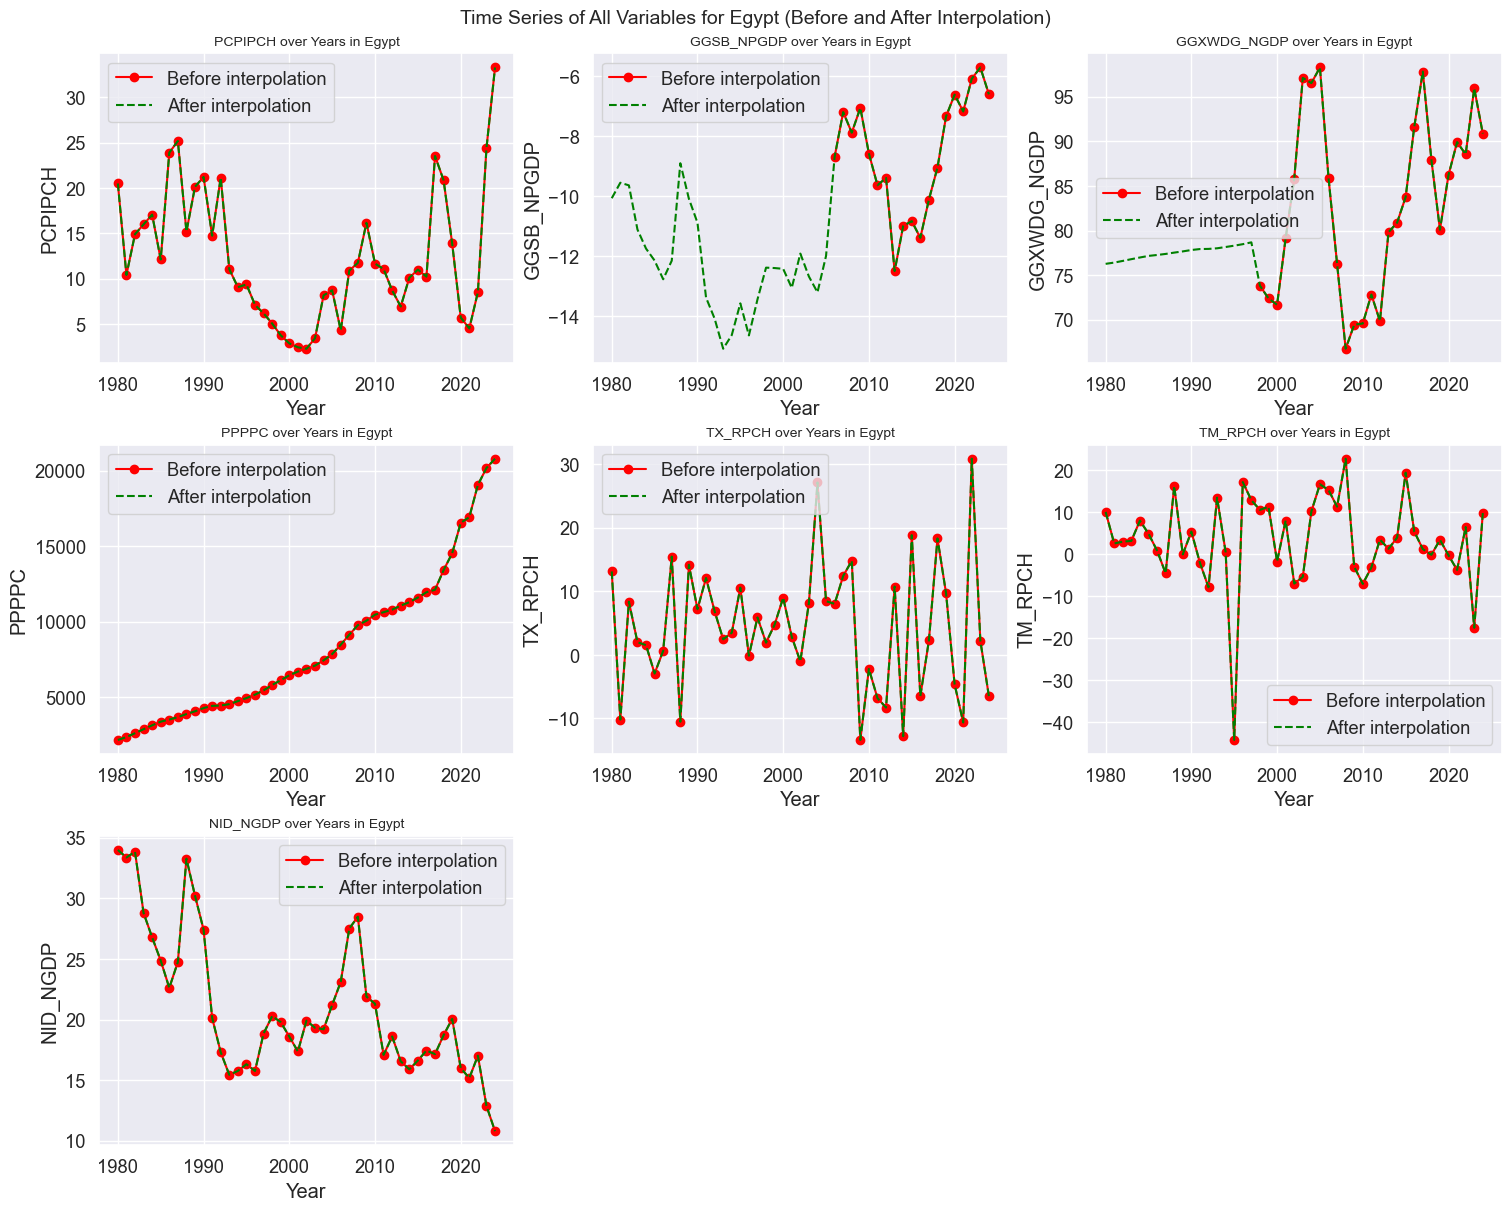

In [15]:
# Select the country
country_name = 'Egypt'#'Belarus'  # Change this as needed

# Columns to interpolate (already defined earlier)
# data_columns = [col for col in filtered_df2.columns if col not in ['WEO_Country_Code', 'Country', 'Advanced_Country', 'Year']]

# Filter data before and after interpolation
before = filtered_df2[filtered_df2['Country'] == country_name]
after = df_interpolated[df_interpolated['Country'] == country_name]

# Create subplots
n_cols = 3
n_rows = (len(data_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)

for i, col in enumerate(data_columns):
    row, col_idx = divmod(i, n_cols)
    ax = axes[row, col_idx]

    ax.plot(before['Year'], before[col], 'o-', label='Before interpolation', color='red')
    ax.plot(after['Year'], after[col], '--', label='After interpolation', color='green')

    ax.set_title(f'{col} over Years in {country_name}', fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(len(data_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Main title
plt.suptitle(f'Time Series of All Variables for {country_name} (Before and After Interpolation)', fontsize=14)
plt.show()


In [16]:
# Get the unique list of countries in the dataset
selected_countries = df_interpolated["Country"].unique()

# Display the list of selected countries
print("Unique countries in dataset:")
print(selected_countries)


Unique countries in dataset:
['Angola' 'Argentina' 'Australia' 'Austria' 'Barbados' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada' 'Guatemala'
 'Guyana' 'Hong Kong SAR' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Ireland' 'Italy' 'Japan' 'Jordan' 'Kazakhstan' 'Korea' 'Kosovo' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta' 'Mauritius' 'Mexico'
 'Morocco' 'Netherlands' 'New Zealand' 'Norway' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia' 'Serbia' 'Singapore'
 'Slovak Republic' 'Slovenia' 'South Africa' 'Spain' 'Suriname' 'Sweden'
 'Switzerland' 'São Tomé and Príncipe' 'Taiwan Province of China'
 'Thailand' 'The Gambia' 'Tunisia' 'Türkiye' 'Ukraine' 'United Kingdom'
 'United States' 'Uruguay']


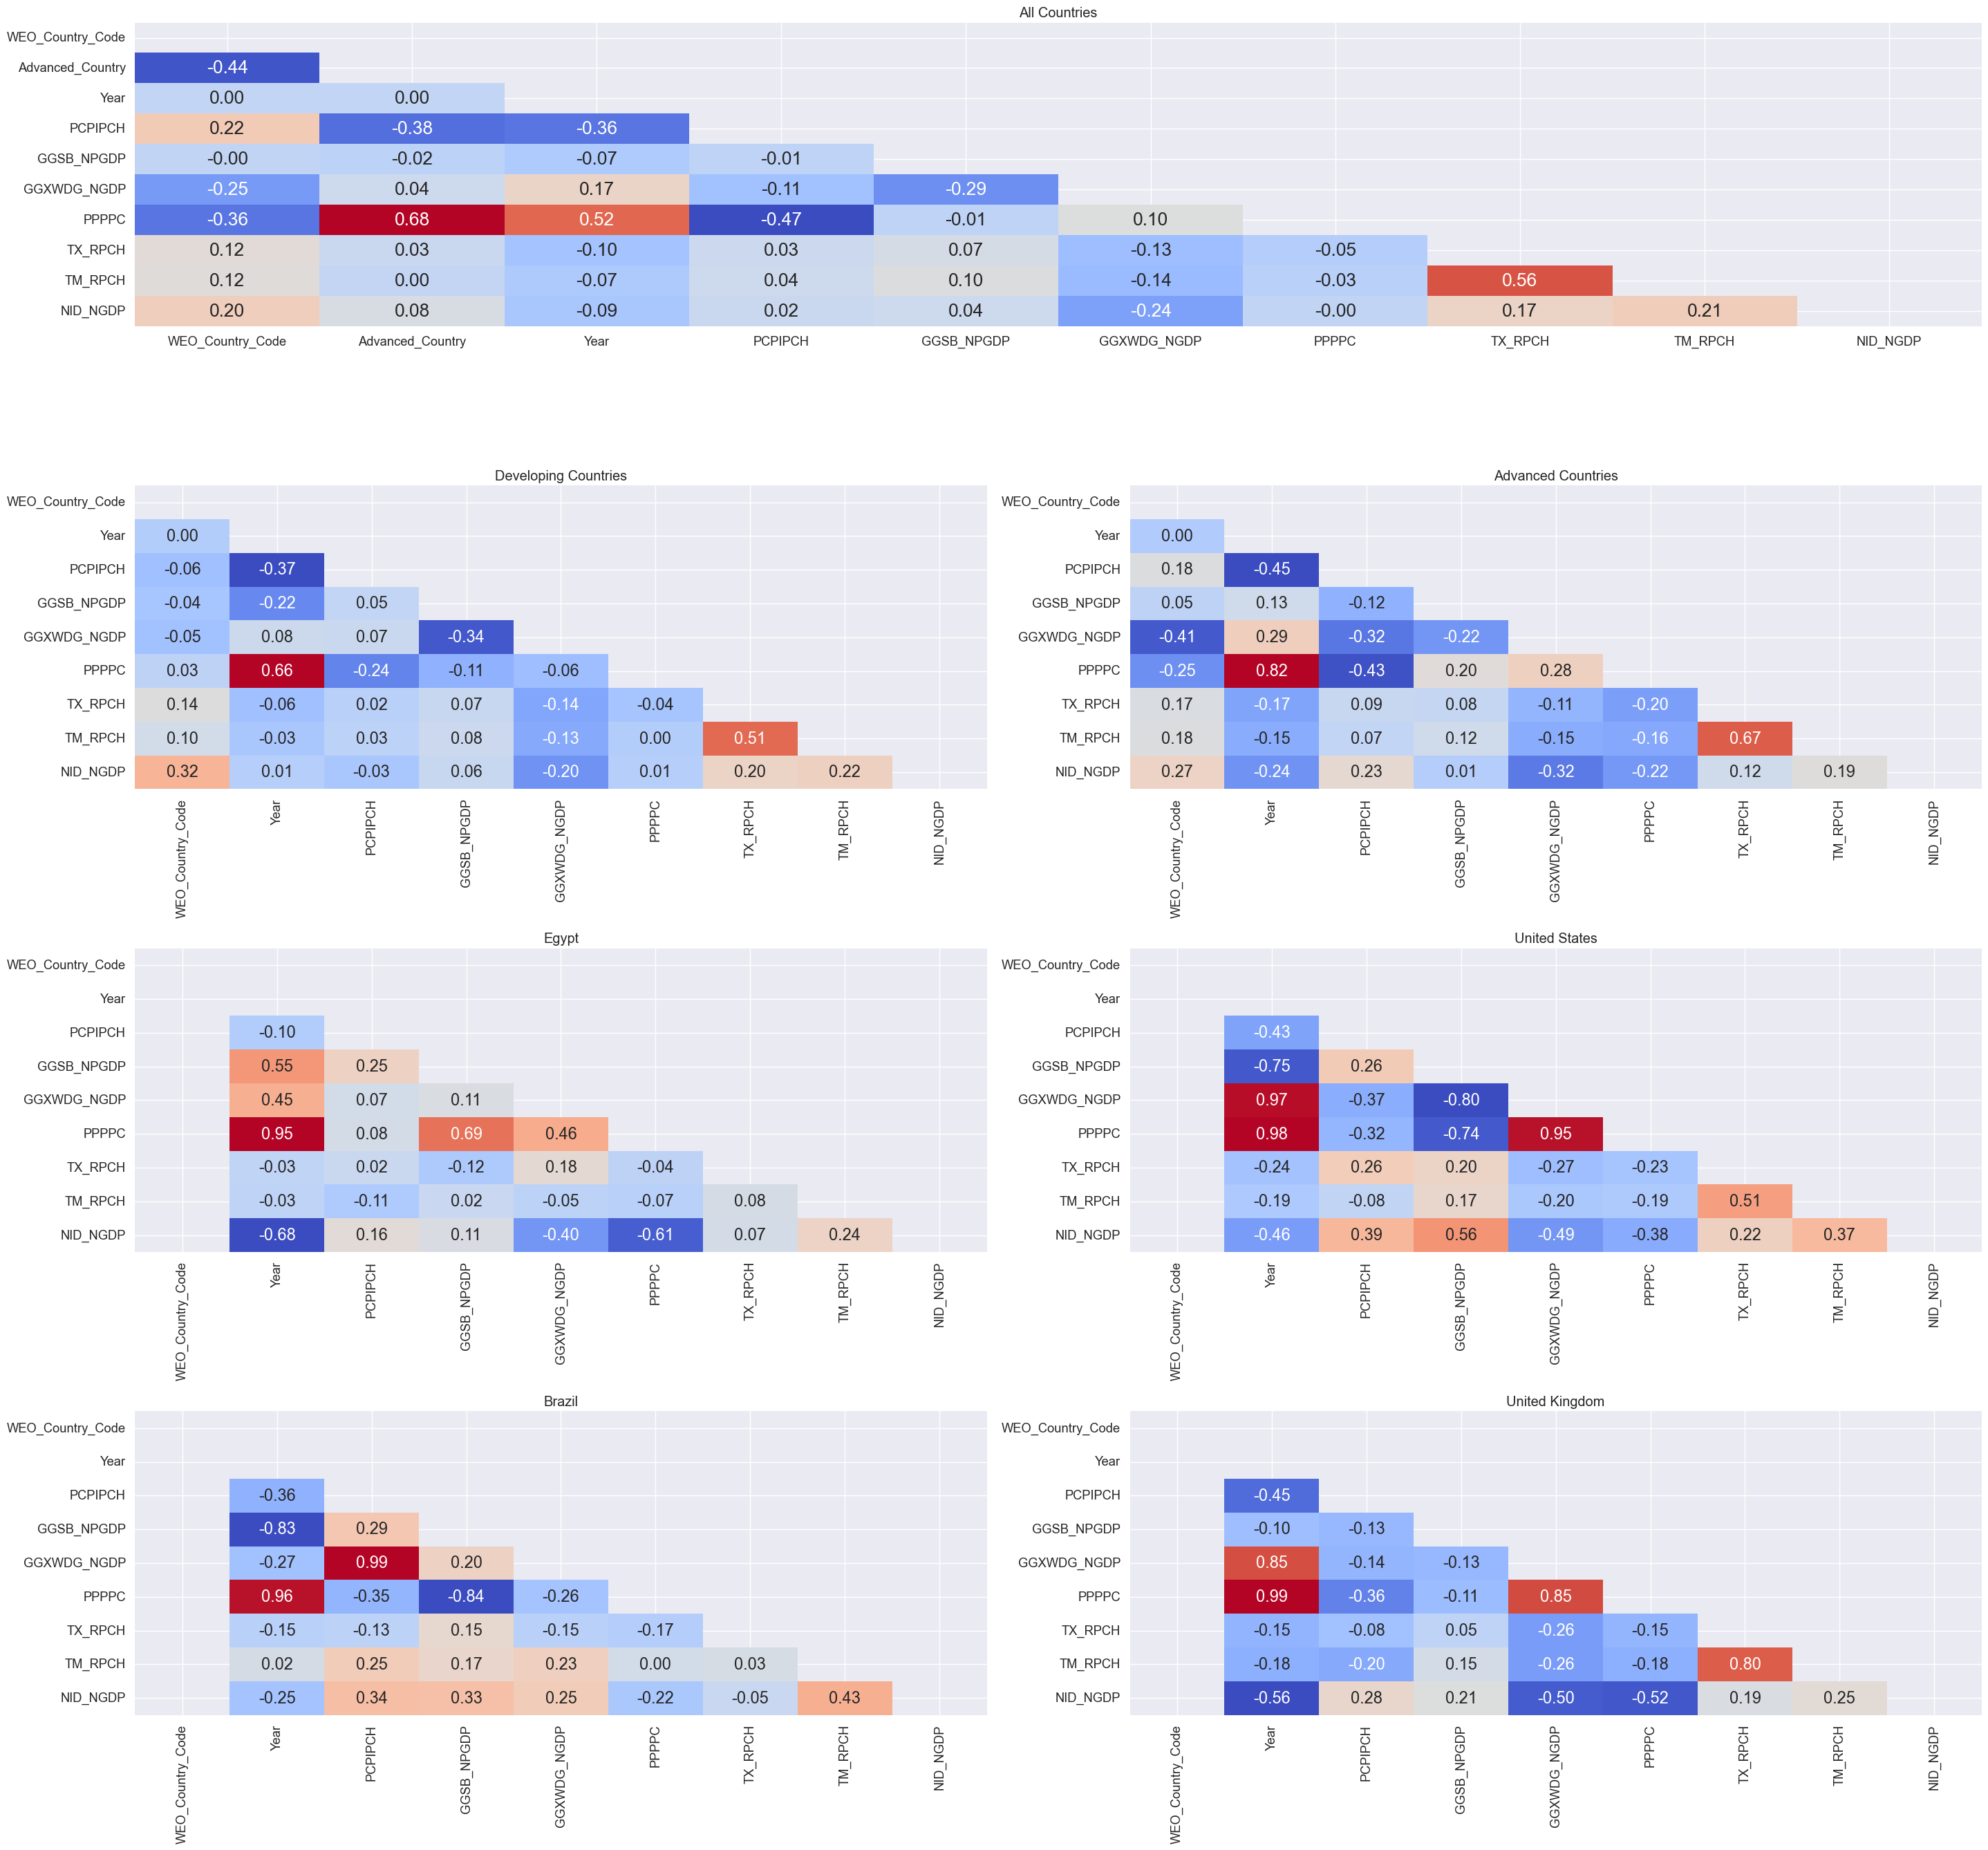

In [17]:
df = df_interpolated.copy()

# Compute correlation matrices
corr_all = df.drop(columns=["Country"]).corr("spearman")
corr_dev = df[df["Advanced_Country"] == 0].drop(columns=["Country", "Advanced_Country"]).corr("spearman")
corr_adv = df[df["Advanced_Country"] == 1].drop(columns=["Country", "Advanced_Country"]).corr("spearman")
corr_eg = df[df["Country"] == "Egypt"].drop(columns=["Country", "Advanced_Country"]).corr()
corr_us = df[df["Country"] == "United States"].drop(columns=["Country", "Advanced_Country"]).corr()
corr_bz = df[df["Country"] == "Brazil"].drop(columns=["Country", "Advanced_Country"]).corr()
corr_uk = df[df["Country"] == "United Kingdom"].drop(columns=["Country", "Advanced_Country"]).corr()

# List of matrices with titles
matrices = [
    ("All Countries", corr_all),
    ("Developing Countries", corr_dev),
    ("Advanced Countries", corr_adv),
    ("Egypt", corr_eg),
    ("United States", corr_us),
    ("Brazil", corr_bz),
    ("United Kingdom", corr_uk)
]

# Create figure and gridspec: 3 rows, 2 columns
fig = plt.figure(figsize=(29, 27))
gs = GridSpec(4, 2, figure=fig)

# First heatmap takes full width (row 0, all columns)
ax1 = fig.add_subplot(gs[0, :])
mask = np.triu(np.ones_like(matrices[0][1], dtype=bool))
sns.heatmap(matrices[0][1], mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=False, annot_kws={"size": 19}, ax=ax1)
ax1.set_title(matrices[0][0])

# Plot remaining 4 heatmaps in a 2x2 grid (rows 1 and 2, cols 0 and 1)
for i, (title, matrix) in enumerate(matrices[1:], start=1):
    row = 1 + (i - 1) // 2  # row 1 or 2
    col = (i - 1) % 2       # col 0 or 1
    ax = fig.add_subplot(gs[row, col])
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    sns.heatmap(matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=False, annot_kws={"size": 17}, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [18]:
df_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3735 entries, 4635 to 2069
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WEO_Country_Code  3735 non-null   int64  
 1   Country           3735 non-null   object 
 2   Advanced_Country  3735 non-null   int64  
 3   Year              3735 non-null   int64  
 4   PCPIPCH           3735 non-null   float64
 5   GGSB_NPGDP        3735 non-null   float64
 6   GGXWDG_NGDP       3735 non-null   float64
 7   PPPPC             3735 non-null   float64
 8   TX_RPCH           3735 non-null   float64
 9   TM_RPCH           3735 non-null   float64
 10  NID_NGDP          3735 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 350.2+ KB


In [70]:
df_interpolated.to_csv(folder_path+"/../01.3-Data_Clean.csv",index=False)

## 2.

In [67]:
# Load the dataset.
df = pd.read_csv("../02-Dataset/01.3-Data_Clean.csv")

### Display Descriptive Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WEO_Country_Code  3735 non-null   int64  
 1   Country           3735 non-null   object 
 2   Advanced_Country  3735 non-null   int64  
 3   Year              3735 non-null   int64  
 4   PCPIPCH           3735 non-null   float64
 5   GGSB_NPGDP        3735 non-null   float64
 6   GGXWDG_NGDP       3735 non-null   float64
 7   PPPPC             3735 non-null   float64
 8   TX_RPCH           3735 non-null   float64
 9   TM_RPCH           3735 non-null   float64
 10  NID_NGDP          3735 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 321.1+ KB


In [68]:
df.PCPIPCH.describe().T

count    3735.000000
mean       24.607861
std       204.616895
min       -86.088515
25%         2.070500
50%         4.184895
75%         9.293000
max      7481.691000
Name: PCPIPCH, dtype: float64

In [71]:

# Compute the mean of PCPIPCH (Inflation Rate) for each country
mean_by_country = df.groupby("Country")["PCPIPCH"].mean().sort_values(ascending=False)

# Select the countries with the highest inflation fluctuation (mean)
top_fluctuating_countries = mean_by_country[mean_by_country > (df.PCPIPCH.quantile(0.75) + ((df.PCPIPCH.quantile(0.75) - df.PCPIPCH.quantile(0.25))*1.5))]
print("Countries with highest inflation rate fluctuations (mean):")
print(top_fluctuating_countries)


Countries with highest inflation rate fluctuations (mean):
Country
Peru          288.182333
Brazil        263.782711
Angola        249.971733
Ukraine       201.772865
Belarus       167.894888
Kazakhstan    114.168324
Russia         60.175944
Croatia        55.009429
Bulgaria       46.114187
Türkiye        40.748644
Poland         34.157267
Romania        32.933200
Uruguay        28.177311
Suriname       22.556933
Mexico         22.521044
Ecuador        20.915778
Name: PCPIPCH, dtype: float64


In [87]:

# Compute the standard deviation of PCPIPCH (Inflation Rate) for each country
std_by_country = df.groupby("Country")["PCPIPCH"].std().sort_values(ascending=False)

# Select the countries with the highest inflation fluctuation (standard deviation)
top_fluctuating_countries = std_by_country[std_by_country > (df.PCPIPCH.quantile(0.75) + ((df.PCPIPCH.quantile(0.75) - df.PCPIPCH.quantile(0.25))*1.5))]
print("Countries with highest inflation rate fluctuations (standard deviation):")
print(top_fluctuating_countries)



Countries with highest inflation rate fluctuations (standard deviation):
Country
Peru          1210.618708
Angola         749.301031
Ukraine        708.277703
Brazil         627.631647
Belarus        374.457601
Kazakhstan     315.865945
Croatia        225.017040
Bulgaria       164.329857
Russia         137.029847
Poland          93.751501
Romania         60.183799
Argentina       55.785676
Mexico          31.586555
Türkiye         30.593876
Uruguay         29.550033
Suriname        26.559598
Ecuador         23.012659
Guyana          21.604212
Name: PCPIPCH, dtype: float64


In [74]:
top_fluctuating_countries = std_by_country.head(6)
print("Countries with highest inflation rate fluctuations (standard deviation):")
print(top_fluctuating_countries)


Countries with highest inflation rate fluctuations (standard deviation):
Country
Peru          1210.618708
Angola         749.301031
Ukraine        708.277703
Brazil         627.631647
Belarus        374.457601
Kazakhstan     315.865945
Name: PCPIPCH, dtype: float64


In [75]:
# Filter the original DataFrame to include only these top fluctuating countries
df_std = df[df['Country'].isin(top_fluctuating_countries.index.to_list())]
df_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 0 to 3599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WEO_Country_Code  270 non-null    int64  
 1   Country           270 non-null    object 
 2   Advanced_Country  270 non-null    int64  
 3   Year              270 non-null    int64  
 4   PCPIPCH           270 non-null    float64
 5   GGSB_NPGDP        270 non-null    float64
 6   GGXWDG_NGDP       270 non-null    float64
 7   PPPPC             270 non-null    float64
 8   TX_RPCH           270 non-null    float64
 9   TM_RPCH           270 non-null    float64
 10  NID_NGDP          270 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 25.3+ KB


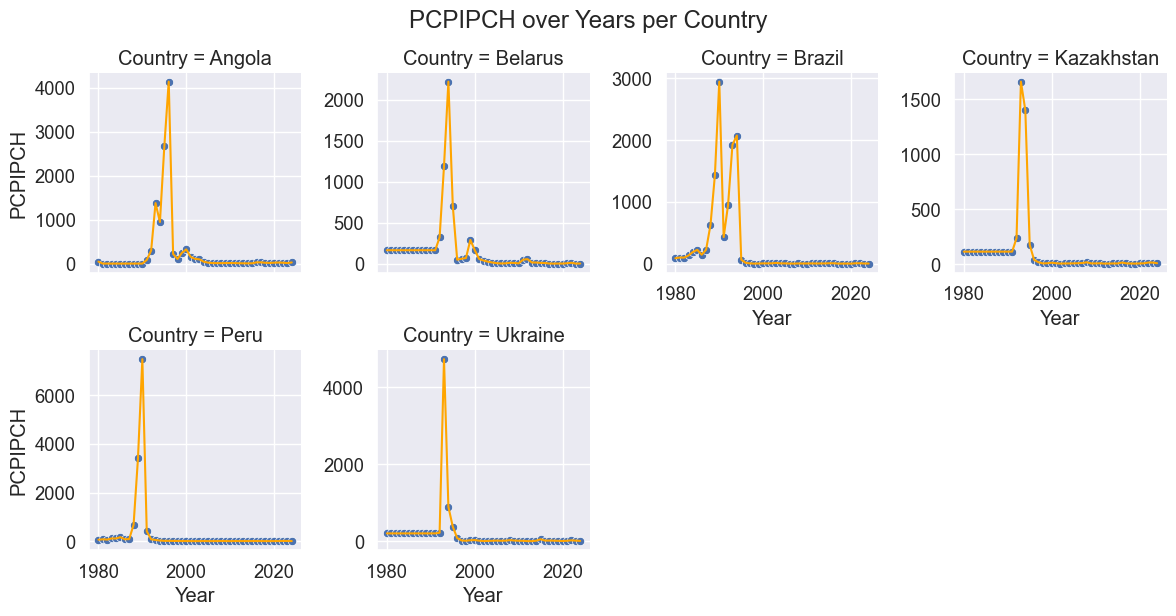

In [76]:
# Line+Point plot  for each country
g = sns.FacetGrid(df_std, col="Country", col_wrap=4, height=3, sharey=False)
g.map_dataframe(sns.scatterplot, x="Year", y="PCPIPCH")
g.map_dataframe(sns.lineplot, x="Year", y="PCPIPCH", color="orange")
g.fig.suptitle("PCPIPCH over Years per Country", y=1.03)
plt.show()

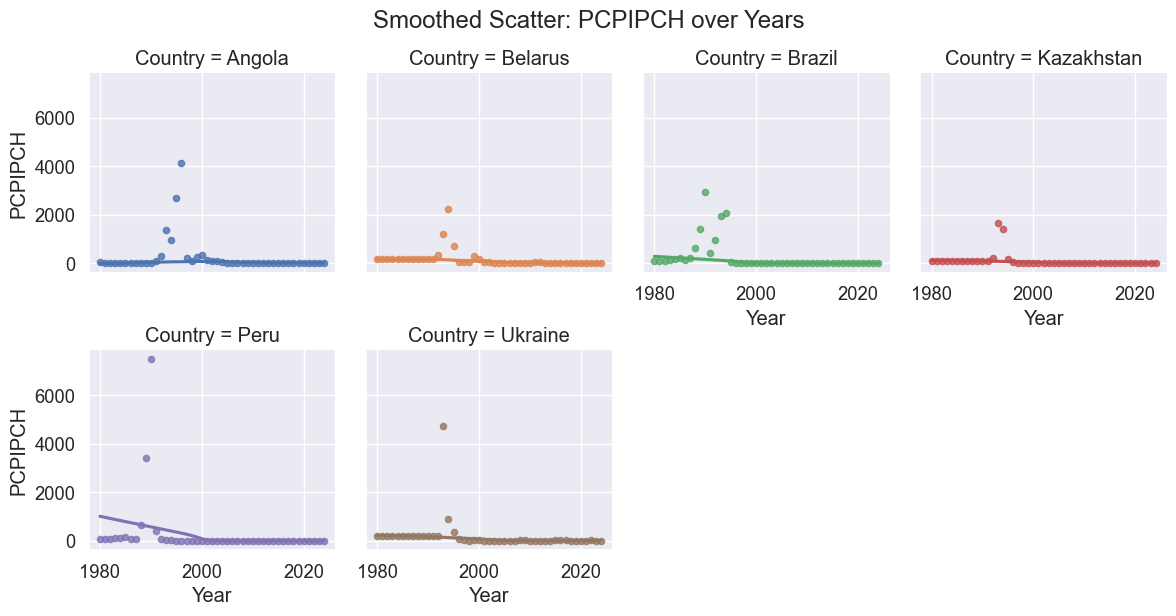

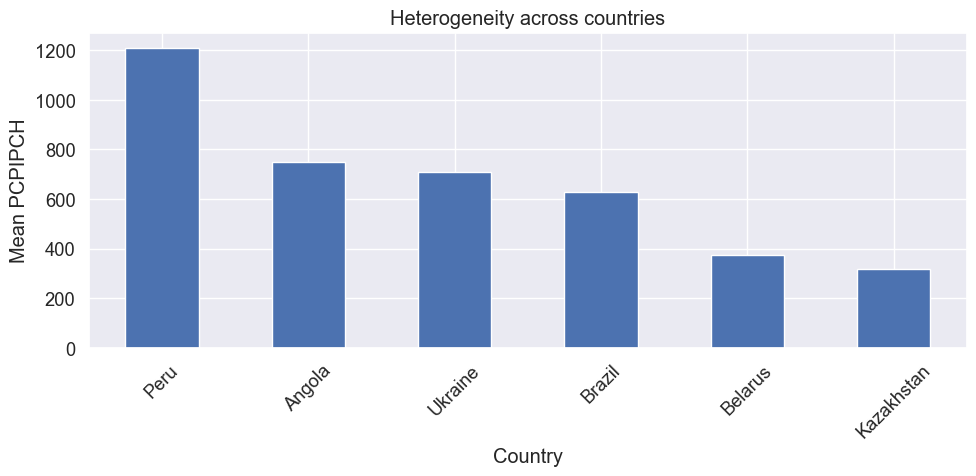

In [77]:
# === Smoothed scatter plot ===
# Scatter with smoothing line per country
sns.lmplot(
    data=df_std,
    x="Year", y="PCPIPCH",
    hue="Country", col="Country", col_wrap=4,
    height=3, aspect=1, lowess=True, scatter_kws={"s": 20}
)
plt.suptitle("Smoothed Scatter: PCPIPCH over Years", y=1.03)
plt.show()

# === Plot means by Country and by Year ===

# Mean plot by Country
mean_country = top_fluctuating_countries
plt.figure(figsize=(10,5))
mean_country.plot(kind='bar', title="Heterogeneity across countries")
plt.ylabel("Mean PCPIPCH")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Selected countries for panel analysis: ['Angola' 'Belarus' 'Brazil' 'Kazakhstan' 'Peru' 'Ukraine']


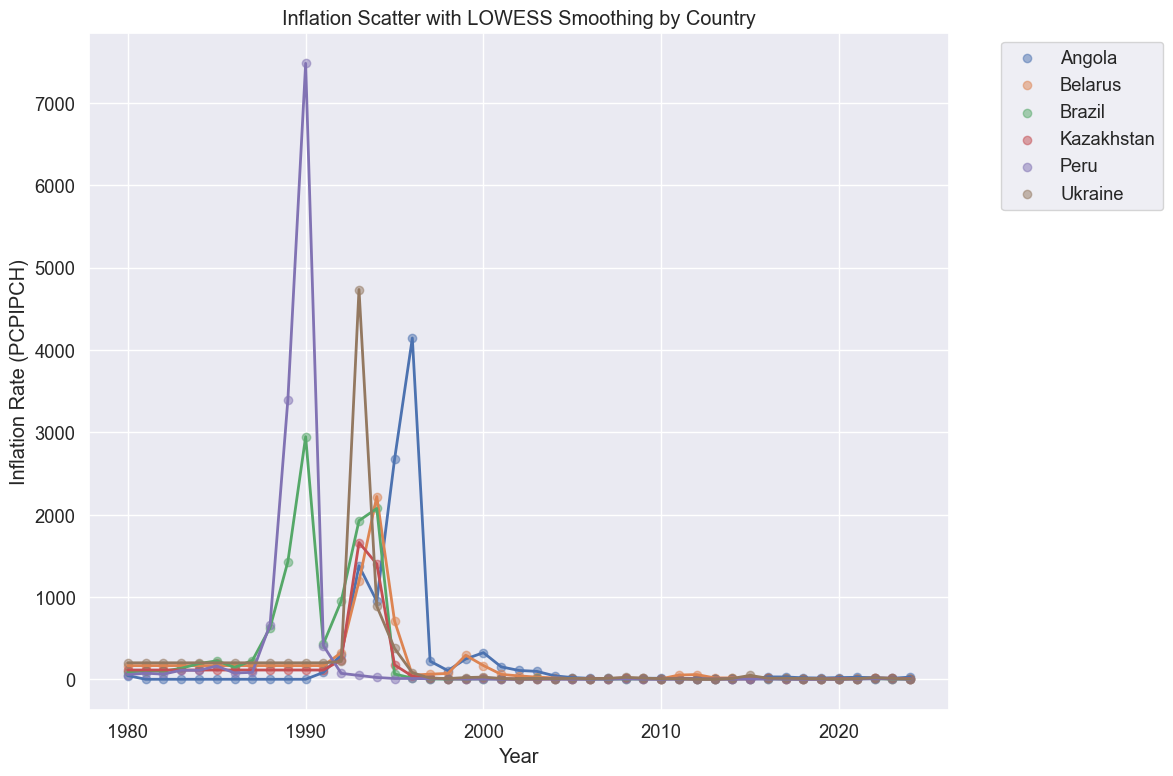

In [78]:

# Display the unique countries to confirm selection
print("Selected countries for panel analysis:", df_std["Country"].unique())

# Scatter with lowess smoothing
plt.figure(figsize=(12, 8))
for country in df_std["Country"].unique():
    data = df_std[df_std["Country"] == country]
    plt.scatter(data["Year"], data["PCPIPCH"], alpha=0.5, label=country)
    # LOWESS smoothing
    smoothed = lowess(data["PCPIPCH"], data["Year"], frac=0.)
    plt.plot(smoothed[:, 0], smoothed[:, 1], linewidth=2)

plt.xlabel("Year")
plt.ylabel("Inflation Rate (PCPIPCH)")
plt.title("Inflation Scatter with LOWESS Smoothing by Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [83]:
df_cleaned = df[~df["Country"].isin(top_fluctuating_countries.index.to_list())].copy()
df_cleaned.PCPIPCH.describe().T

count    3465.000000
mean        9.827007
std        40.706667
min       -86.088515
25%         1.964000
50%         3.943000
75%         8.534000
max      1518.531000
Name: PCPIPCH, dtype: float64

In [84]:
df_cleaned.Country.value_counts()

Country
Argentina      45
Netherlands    45
Portugal       45
Poland         45
Philippines    45
               ..
Germany        45
Georgia        45
France         45
Finland        45
Uruguay        45
Name: count, Length: 77, dtype: int64

In [88]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3465 entries, 45 to 3734
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WEO_Country_Code  3465 non-null   int64  
 1   Country           3465 non-null   object 
 2   Advanced_Country  3465 non-null   int64  
 3   Year              3465 non-null   int64  
 4   PCPIPCH           3465 non-null   float64
 5   GGSB_NPGDP        3465 non-null   float64
 6   GGXWDG_NGDP       3465 non-null   float64
 7   PPPPC             3465 non-null   float64
 8   TX_RPCH           3465 non-null   float64
 9   TM_RPCH           3465 non-null   float64
 10  NID_NGDP          3465 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 324.8+ KB


In [89]:
df_cleaned.to_csv(folder_path+"/../01.4-Data_Clean.csv",index=False)

# **END**